In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time


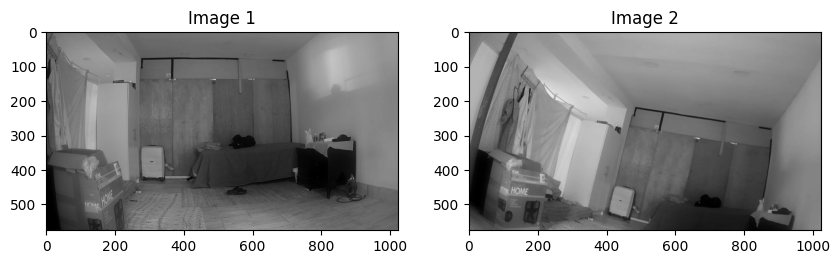

In [2]:
# Replace these paths with your own images
img1 = cv2.imread('2025-06-26-135736.jpg')  # Query image
img2 = cv2.imread('2025-06-26-140633.jpg')  # Train image

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray1, cmap='gray')
plt.title('Image 1')

plt.subplot(1,2,2)
plt.imshow(gray2, cmap='gray')
plt.title('Image 2')
plt.show()


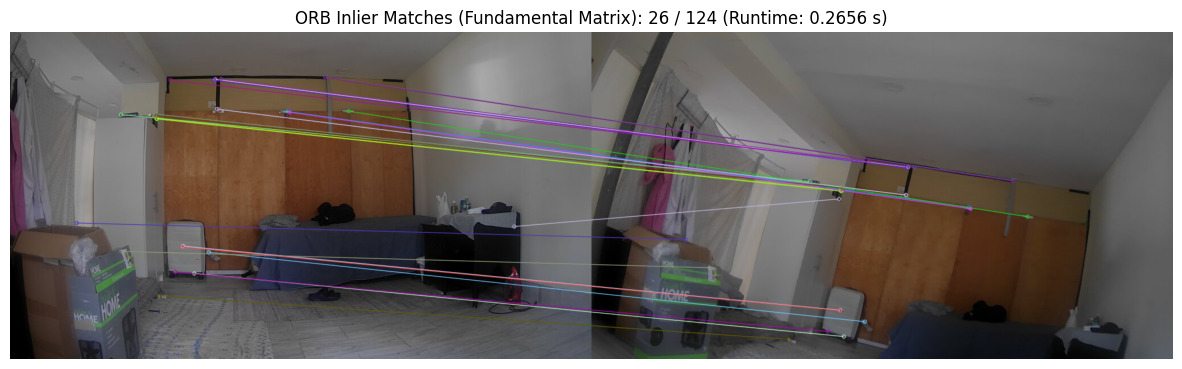

In [3]:
# ORB detector
orb = cv2.ORB_create()

start_orb = time.time()

# Detect keypoints and compute descriptors
kp1_orb, des1_orb = orb.detectAndCompute(gray1, None)
kp2_orb, des2_orb = orb.detectAndCompute(gray2, None)

# Match using Hamming distance
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(des1_orb, des2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

# Extract matched keypoints
pts1 = np.float32([kp1_orb[m.queryIdx].pt for m in matches_orb]).reshape(-1, 1, 2)
pts2 = np.float32([kp2_orb[m.trainIdx].pt for m in matches_orb]).reshape(-1, 1, 2)

# Estimate fundamental matrix + get inlier mask
F_orb, mask_orb = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC, 1.0, 0.99)
inliers_orb = mask_orb.ravel().tolist() if mask_orb is not None else []

end_orb = time.time()

# Draw only inlier matches
img_inlier_orb = cv2.drawMatches(
    img1, kp1_orb, img2, kp2_orb,
    [m for i, m in enumerate(matches_orb) if inliers_orb[i]],
    None, flags=2
)

plt.figure(figsize=(15, 6))
plt.imshow(cv2.cvtColor(img_inlier_orb, cv2.COLOR_BGR2RGB))
plt.title(f'ORB Inlier Matches (Fundamental Matrix): {np.sum(inliers_orb)} / {len(matches_orb)} (Runtime: {end_orb - start_orb:.4f} s)')
plt.axis('off')
plt.show()


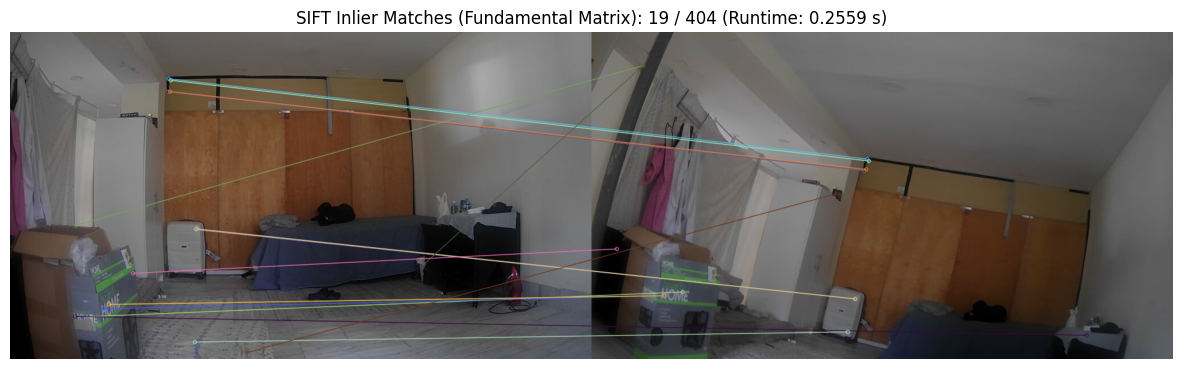

In [4]:
# SIFT detector
sift = cv2.SIFT_create()

start_sift = time.time()

# Detect and compute
kp1_sift, des1_sift = sift.detectAndCompute(gray1, None)
kp2_sift, des2_sift = sift.detectAndCompute(gray2, None)

# Match using L2 norm
bf_sift = cv2.BFMatcher()
matches_sift = bf_sift.match(des1_sift, des2_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

# Extract matched keypoints
pts1 = np.float32([kp1_sift[m.queryIdx].pt for m in matches_sift]).reshape(-1, 1, 2)
pts2 = np.float32([kp2_sift[m.trainIdx].pt for m in matches_sift]).reshape(-1, 1, 2)

# Estimate fundamental matrix + get inlier mask
F_sift, mask_sift = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC, 1.0, 0.99)
inliers_sift = mask_sift.ravel().tolist() if mask_sift is not None else []

end_sift = time.time()

# Draw only inlier matches
img_inlier_sift = cv2.drawMatches(
    img1, kp1_sift, img2, kp2_sift,
    [m for i, m in enumerate(matches_sift) if inliers_sift[i]],
    None, flags=2
)

plt.figure(figsize=(15, 6))
plt.imshow(cv2.cvtColor(img_inlier_sift, cv2.COLOR_BGR2RGB))
plt.title(f'SIFT Inlier Matches (Fundamental Matrix): {np.sum(inliers_sift)} / {len(matches_sift)} (Runtime: {end_sift - start_sift:.4f} s)')
plt.axis('off')
plt.show()


In [5]:
print("== Fundamental Matrix RANSAC Performance ==")
print(f"ORB  - Runtime: {end_orb - start_orb:.4f} s | Inliers: {np.sum(inliers_orb)} / {len(matches_orb)}")
print(f"SIFT - Runtime: {end_sift - start_sift:.4f} s | Inliers: {np.sum(inliers_sift)} / {len(matches_sift)}")


== Fundamental Matrix RANSAC Performance ==
ORB  - Runtime: 0.2656 s | Inliers: 26 / 124
SIFT - Runtime: 0.2559 s | Inliers: 19 / 404
